<H3>Learning acknowledgement </H3> <p>https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons <br></p>
Its a very basic data visualization done during the process of learning Pandas and Data Science. I hope to improve over time! 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv


<H2> Reading the dataset </H2>

In [2]:
dataset = pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv", parse_dates=['Date'])
dataset.replace(np.nan, "NA", inplace=True)
dataset.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NA,Thailand,15.0000,101.0000,2020-01-22,2,0,0
1,NA,Japan,36.0000,138.0000,2020-01-22,2,0,0
2,NA,Singapore,1.2833,103.8333,2020-01-22,0,0,0
3,NA,Nepal,28.1667,84.2500,2020-01-22,0,0,0
4,NA,Malaysia,2.5000,112.5000,2020-01-22,0,0,0
5,British Columbia,Canada,49.2827,-123.1207,2020-01-22,0,0,0
6,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0
7,Victoria,Australia,-37.8136,144.9631,2020-01-22,0,0,0
8,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0
9,NA,Cambodia,11.5500,104.9167,2020-01-22,0,0,0


<H2> Adding additional coloumn for active state</H2>

In [3]:
dataset['Active'] = dataset['Confirmed'] - dataset['Deaths'] - dataset['Recovered']
dataset.head(10)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NA,Thailand,15.0000,101.0000,2020-01-22,2,0,0,2
1,NA,Japan,36.0000,138.0000,2020-01-22,2,0,0,2
2,NA,Singapore,1.2833,103.8333,2020-01-22,0,0,0,0
3,NA,Nepal,28.1667,84.2500,2020-01-22,0,0,0,0
4,NA,Malaysia,2.5000,112.5000,2020-01-22,0,0,0,0
5,British Columbia,Canada,49.2827,-123.1207,2020-01-22,0,0,0,0
6,New South Wales,Australia,-33.8688,151.2093,2020-01-22,0,0,0,0
7,Victoria,Australia,-37.8136,144.9631,2020-01-22,0,0,0,0
8,Queensland,Australia,-28.0167,153.4000,2020-01-22,0,0,0,0
9,NA,Cambodia,11.5500,104.9167,2020-01-22,0,0,0,0


<H2>Visualizing the crisis Country wise </H2>

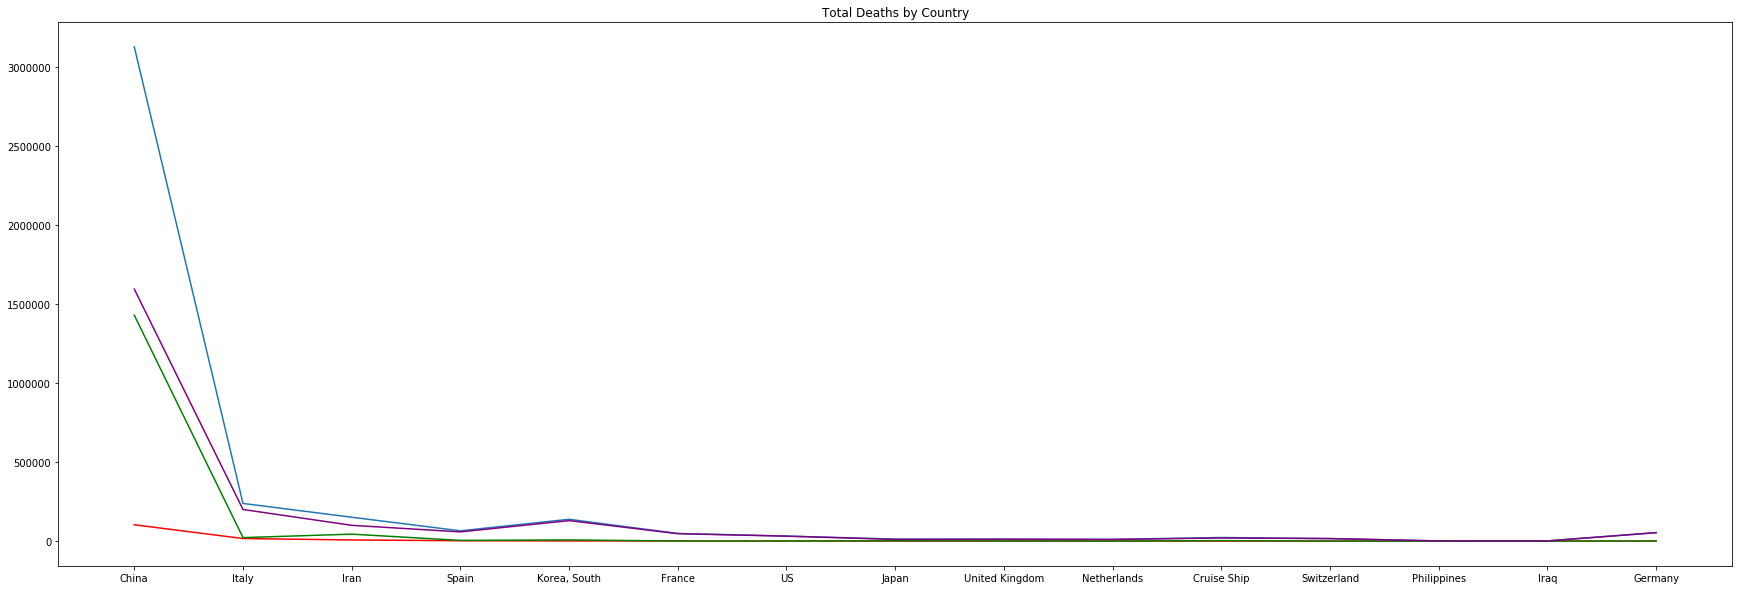

In [4]:
grouped = dataset.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
grouped = grouped.sort_values(by='Deaths', ascending=False)
grouped = grouped[grouped['Deaths']>100]
plt.figure(figsize=(30, 10))
plt.plot(grouped['Country/Region'], grouped['Deaths'],color='red')
plt.plot(grouped['Country/Region'], grouped['Confirmed'])
plt.plot(grouped['Country/Region'], grouped['Recovered'], color='green')
plt.plot(grouped['Country/Region'], grouped['Active'], color='purple')

plt.title('Total Deaths by Country')
plt.show()

<H2>Vizualizing the crisis Country wise by different plotting tool</H2>

In [5]:
grouped = dataset.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
grouped = grouped.sort_values(by='Confirmed', ascending=False)
grouped.head()

temp = grouped.melt(id_vars=['Country/Region'], value_vars=['Confirmed', 'Deaths', 'Recovered'], var_name='Case', value_name='Count').sort_values('Count', ascending=False)
temp = temp[temp['Count'] > 0]
temp.head()

fig = px.bar(temp, x='Country/Region', y='Count', barmode='group', color='Case')
fig.show()
temp


,Country/Region,Case,Count
0,China,Confirmed,3124622
304,China,Recovered,1428378
1,Italy,Confirmed,238049
2,Iran,Confirmed,150833
3,"Korea, South",Confirmed,137889
...,...,...,...
238,Moldova,Deaths,1
411,Nigeria,Recovered,1
262,Cuba,Deaths,1
253,Bangladesh,Deaths,1


<H2> Grouping data on basis of Country, State and Date </H2>

In [6]:
grouped = dataset.groupby(["Country/Region", "Province/State", "Date"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
grouped = grouped.sort_values(by='Confirmed', ascending=False)
grouped = grouped.loc[grouped.sum(axis=1)>0]
grouped

# lets see for china how many cases are reported till now
china = grouped.loc[grouped['Country/Region']=='China']
print(china.sum(axis=0).drop(['Country/Region','Province/State']))
china

Deaths        103112
Confirmed    3124622
Recovered    1428378
Active       1593132
dtype: object


,Country/Region,Province/State,Date,Deaths,Confirmed,Recovered,Active
3419,China,Hubei,2020-03-18,3122,67800,56927,7751
3418,China,Hubei,2020-03-17,3111,67799,56003,8685
3417,China,Hubei,2020-03-16,3099,67798,55142,9557
3416,China,Hubei,2020-03-15,3085,67794,54288,10421
3415,China,Hubei,2020-03-14,3075,67790,52960,11755
...,...,...,...,...,...,...,...
3534,China,Jiangsu,2020-01-22,0,1,0,1
4331,China,Tibet,2020-03-18,0,1,1,0
3136,China,Hebei,2020-01-23,1,1,0,0
3135,China,Hebei,2020-01-22,0,1,0,1


<H2> Get the data for cases reported and their status - Active, Death or Recovered on last date in dataset</H2>

In [7]:
latestCase = dataset.groupby(["Country/Region", "Province/State", "Date"])["Deaths", "Confirmed", "Recovered", "Active"].sum().sort_values(by='Date', ascending=False).reset_index()
latestCase = latestCase[latestCase['Date'] == max(latestCase['Date'])]
nonZeroLatestCase = latestCase[latestCase.sum(axis = 1) > 0]
zeroLatestCase = latestCase.merge(nonZeroLatestCase, how = 'outer' ,indicator=True).loc[lambda x:x['_merge'] == 'left_only']

print("Total Cases reported in World on ", max(latestCase['Date']))
print(nonZeroLatestCase.drop(['Country/Region', 'Province/State', 'Date'], axis=1).sum(axis=0)) # gives total no.
print("********************************")

countries = ['China', 'US', 'Itlay', 'India', 'Iran']
for _country in countries:
    print("Total Cases reported in {} on {}".format(_country, max(latestCase['Date'])))
    country = nonZeroLatestCase.loc[nonZeroLatestCase['Country/Region']== _country].sort_values("Confirmed", ascending=False)
    print(country.drop(['Country/Region', 'Province/State', 'Date'], axis = 1).sum(axis=0))
    print("********************************")

Total Cases reported in World on  2020-03-18 00:00:00
Deaths         8733
Confirmed    214910
Recovered     83207
Active       122970
dtype: int64
********************************
Total Cases reported in China on 2020-03-18 00:00:00
Deaths        3241
Confirmed    81102
Recovered    69755
Active        8106
dtype: int64
********************************
Total Cases reported in US on 2020-03-18 00:00:00
Deaths        118
Confirmed    7783
Recovered       0
Active       7665
dtype: int64
********************************
Total Cases reported in Itlay on 2020-03-18 00:00:00
Deaths       0
Confirmed    0
Recovered    0
Active       0
dtype: int64
********************************
Total Cases reported in India on 2020-03-18 00:00:00
Deaths         3
Confirmed    156
Recovered     14
Active       139
dtype: int64
********************************
Total Cases reported in Iran on 2020-03-18 00:00:00
Deaths        1135
Confirmed    17361
Recovered     5389
Active       10837
dtype: int64
**********

<H2> Finding correlation between Confirmed, Deaths, Recovered</H2>

In [8]:
datasetByDate = dataset.drop(['Lat', 'Long'], axis=1).groupby('Date').sum().reset_index()
datasetByDate.head()

,Date,Confirmed,Deaths,Recovered,Active
0,2020-01-22,554,17,28,509
1,2020-01-23,652,18,30,604
2,2020-01-24,939,26,36,877
3,2020-01-25,1432,42,39,1351
4,2020-01-26,2113,56,52,2005


In [9]:
datasetByDate['Confirmed'].corr(datasetByDate['Deaths'])

0.9885433992064101

In [10]:
datasetByDate['Confirmed'].corr(datasetByDate['Recovered'])

0.9359240365976017

In [11]:
datasetByDate['Recovered'].corr(datasetByDate['Deaths'])

0.952295860725684

why recovered and death is coming out +ve? shouldn't it be -ve as no. of deaths is inversely proportional to recovered? Is there as lurking variable? May be its increase in no. of confirmed cases? Lets plot the data against each other.

<H2>Visualizing the current state in United States</H2>

In [12]:
us = dataset[dataset['Country/Region']=='US'].drop(['Country/Region','Lat', 'Long'], axis=1)
us = us[us.sum(axis = 1) > 0]
us

,Province/State,Date,Confirmed,Deaths,Recovered,Active
9045,Diamond Princess,2020-02-24,36,0,0,36
9316,Diamond Princess,2020-02-25,36,0,0,36
9587,Diamond Princess,2020-02-26,42,0,0,42
9858,Diamond Princess,2020-02-27,42,0,0,42
10129,Diamond Princess,2020-02-28,44,0,0,44
...,...,...,...,...,...,...
15329,Wyoming,2020-03-18,15,0,0,15
15399,Alabama,2020-03-18,46,0,0,46
15402,Puerto Rico,2020-03-18,5,0,0,5
15416,Guam,2020-03-18,5,0,0,5


<H2> States with Covid-19 case confirmed</H2>

In [13]:
cases = us
cases = cases.groupby(['Province/State'])['Confirmed'].sum().reset_index()
cases = cases[cases['Confirmed'] > 0]
fig = px.bar(cases, x='Province/State', y='Confirmed', title='State wise confirmed cases of COVID-19', text='Confirmed')
fig.show()

<H2> States with Deaths reported till now and the number of it reported</H2>

In [14]:
cases = us
cases = cases.groupby(['Province/State'])['Deaths'].sum().reset_index()
cases = cases[cases['Deaths'] > 0]
fig = px.bar(cases, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19', text='Deaths')
fig.show()

<H2> States which have seen recovery </H2> 

In [15]:
cases = us
cases = cases.groupby(['Province/State'])['Recovered'].sum().reset_index()
cases = cases[cases['Recovered'] > 0]
fig = px.bar(cases, x='Province/State', y='Recovered', title='State wise recovered cases of COVID-19', text='Recovered')
fig.show()

<H2> State that have cases reported, but no deaths and recovery reported yet</H2>

In [16]:
cases = us[us['Confirmed']==us['Active']]
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases
fig = px.bar(cases, x='Province/State', y='Confirmed', text='Active', title='Total confirmed cases with no deaths or recovery reported till now in US')
fig.show()

<H2>States where all the confirmed cases died </H2>

In [17]:
cases = us[us['Confirmed']==us['Deaths']]
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases
fig = px.bar(cases, x='Province/State', y='Deaths', title='Total confirmed cases with all deaths and no recovery in US')
fig.show()

<H2>States where all the confirmed cases recovered </H2>

In [18]:
cases = us[us['Confirmed']==us['Recovered']]
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases
fig = px.bar(cases, x='Province/State', y='Confirmed', title='Total confirmed cases with no deaths and all recovered in US')
fig.show()

<H2> Combining the above graph in one </H2> 

In [19]:
cases = us
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases = pd.melt(cases, id_vars='Province/State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig = px.bar(cases, x='Province/State', y='Count', text='Count', barmode='group', color='Case', title='State wise status of COVID-19')
fig.show()

<H2> Visualizing the cases trend over time </H2>

In [20]:
cases = us
cases = cases.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases = cases[cases.sum(axis=1)>0]

<H2> Confirmed cases trend</H2>

In [21]:
fig = px.line(cases, x='Date', y='Confirmed', text='Confirmed', title='Over time confirmed status of COVID-19')
fig.show()

<H2> Deaths trend</H2>

In [22]:
fig = px.line(cases, x='Date', y='Deaths', text='Deaths', title='Over time death status of COVID-19')
fig.show()

<H2> Recovery trend </H2>

In [23]:
fig = px.line(cases, x='Date', y='Recovered', text='Recovered', title='Over time recovery status of COVID-19')
fig.show()

<H2> Active status trend </H2>

In [24]:
fig = px.line(cases, x='Date', y='Active', text='Active', title='Over time active status of COVID-19')
fig.show()